En este ejercicio vas a tener que cargar el dataset de “data/stocks_price_final.csv”, con el esquema correcto de datos, y realizar los siguiente:

* Eliminar o renombrar la variable market.cap

* Filtrar los datos donde el valor de “open” es nulo y eliminar esas filas

* Calcular el mínimo y máximo de data, open, close y adjusted

* Convertir un DataFrame de Spark en un DataFrame de pandas

* Calcular la media de las variables opne, close y adjusted por industria

* Generar un gráfico de líneas donde se muestre la media de open por industria

* Generar un heatmap con seaborn donde se muestre la correlación entre las medias de open, close y adjusted

* Guardar en un archivo parquet una selección de datos

In [1]:
import findspark
findspark.init()
import pyspark

In [2]:
from pyspark.sql import functions as f
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master('local[*]')\
        .appName('analitica_spark')\
        .getOrCreate()

In [4]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [5]:
data = spark.read.csv(
        'C:/Users/brjmr/Desktop/cursos/data/stocks_price_final.csv',
        sep= ',',
        header = True,
        schema = final_struc)

In [6]:
data = data.withColumnRenamed('market.cap', 'market_cap')

In [16]:
data.filter('open is null').show()

+----+------+----------+----+----+----+-----+------+--------+----------+-------------+--------------------+--------+
| _c0|symbol|      data|open|high| low|close|volume|adjusted|market_cap|       sector|            industry|exchange|
+----+------+----------+----+----+----+-----+------+--------+----------+-------------+--------------------+--------+
|4378|  KRKR|2020-05-11|null|null|null| null|  null|    null|  $130.48M|Miscellaneous|   Business Services|  NASDAQ|
|5747|  NMTR|2020-01-23|null|null|null| null|  null|    null|   $54.96M|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5748|  NMTR|2020-01-24|null|null|null| null|  null|    null|   $54.96M|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5749|  NMTR|2020-01-27|null|null|null| null|  null|    null|   $54.96M|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5750|  NMTR|2020-01-28|null|null|null| null|  null|    null|   $54.96M|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5751|  NMTR|2020-01-29|null|null|null| null|  null|    null|   

In [17]:
data.na.drop()

DataFrame[_c0: int, symbol: string, data: date, open: double, high: double, low: double, close: double, volume: int, adjusted: double, market_cap: string, sector: string, industry: string, exchange: string]

In [18]:
from pyspark.sql.functions import col, min, max, avg, lit

data_transf = data.groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"),  

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 

      )

In [20]:
data_transf.toPandas()

,sector,From,To,Minimum Opening,Maximum Opening,Minimum Closing,Maximum Closing,Minimum Adjusted Closing,Maximum Adjusted Closing
0,Miscellaneous,2019-01-02,2020-07-22,0.147,1.059990e+03,0.1361,1.035830e+03,0.136100,1.035830e+03
1,Health Care,2019-01-02,2020-07-22,0.072,1.860000e+05,0.0710,1.870000e+05,0.071000,1.870000e+05
2,Public Utilities,2019-01-02,2020-07-22,0.331,2.800000e+02,0.3250,2.822200e+02,0.325000,2.806739e+02
3,Energy,2019-01-02,2020-07-22,0.100,9.050000e+02,0.0900,9.010400e+02,0.090000,8.790570e+02
4,Consumer Non-Durables,2019-01-02,2020-07-22,0.120,6.550000e+02,0.1200,6.641300e+02,0.120000,6.641300e+02
5,Finance,2019-01-02,2020-07-22,0.250,1.336930e+03,0.2700,1.341080e+03,0.270000,1.341080e+03
6,Basic Industries,2019-01-02,2020-07-22,0.230,1.601682e+08,0.2300,1.583766e+08,0.230000,1.572494e+08
7,Capital Goods,2019-01-02,2020-07-22,0.130,4.025000e+03,0.1200,4.037770e+03,-1.230099,4.037770e+03
8,Technology,2019-01-02,2020-07-22,0.140,2.704000e+03,0.1300,2.736000e+03,0.130000,2.736000e+03
9,Consumer Services,2019-01-02,2020-07-22,0.100,1.543750e+04,0.1340,1.984375e+04,0.134000,1.984375e+04


In [21]:
data_df = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
data_df

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Miscellaneous manufacturing industries,15.660586,15.650935,15.369819
...,...,...,...,...
130,Newspapers/Magazines,37.148455,37.200996,36.816791
131,Ordnance And Accessories,39.697790,39.702395,38.673986
132,Movies/Entertainment,19.157668,19.123131,18.897540
133,Electronics Distribution,6.428699,6.430408,6.377569


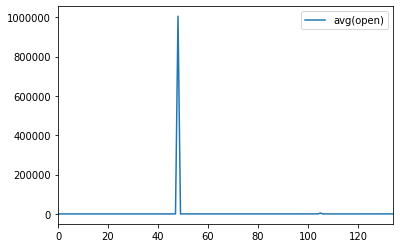

In [22]:
data_df[['industry', 'avg(open)']].plot()

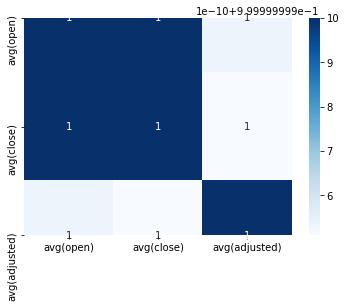

In [23]:
import seaborn as sb
corr = data_df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [24]:
# Parquet
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.parquet', format='parquet')

AnalysisException: path file:/C:/Users/brjmr/Desktop/Cursos/PySpark/Analítica de datos con PySpark/dataset.parquet already exists.;